**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EXPLORATORY DATA ANALYSIS (EDA)**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


***1) Dealing with null values***

In [6]:
data.isna().any()

review       False
sentiment    False
dtype: bool

In [7]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

***2) Dealing with duplicated values***

In [8]:
data['review'].nunique()

49582

In [9]:
data.shape

(50000, 2)

In [10]:
data['review'].drop_duplicates(inplace = True)

In [11]:
data['review'].nunique()

49582

In [12]:
data.shape

(50000, 2)

In [13]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [14]:
import string

# define a function to remove punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

# convert text to lower case and remove punctuation
data['review'] = data['review'].apply(lambda x: remove_punctuation(x.lower()))

In [15]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [16]:
data['sentiment']=data['sentiment'].replace({'positive':1,"negative":0})  

In [17]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


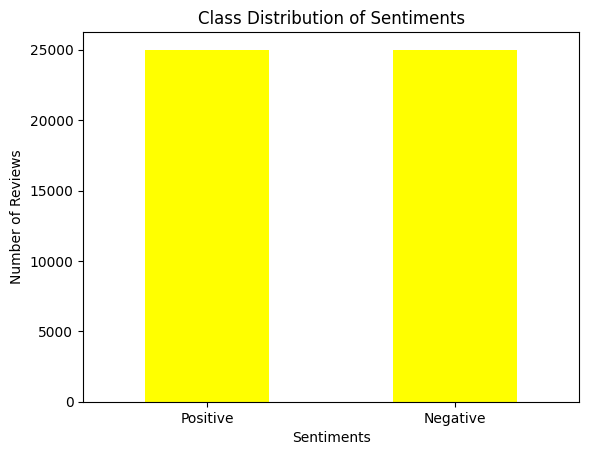

In [19]:
# Create a bar plot of the class distribution
class_counts = data['sentiment'].value_counts()
ax = class_counts.plot(kind='bar', color='yellow')
ax.set_title('Class Distribution of Sentiments')
ax.set_xlabel('Sentiments')
ax.set_ylabel('Number of Reviews')
ax.set_xticklabels(['Positive', 'Negative'], rotation=0)
plt.show()


***3)Data visualization using word cloud for finding the most used words for each type of sentiment***

In [20]:
ex=data['review'][0]
ex

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

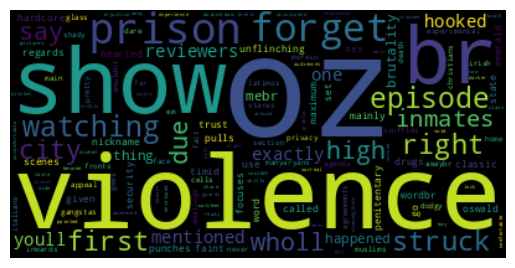

In [21]:
wordcloud = WordCloud().generate(ex)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

***4) Word Count***

In [22]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [23]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['review'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [24]:
# Split the text into individual words
words = all_text.split()

In [25]:
import nltk

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [28]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('br', 113794),
 ('movie', 83510),
 ('film', 74453),
 ('one', 51024),
 ('like', 38989),
 ('good', 28569),
 ('even', 24572),
 ('would', 24024),
 ('time', 23257),
 ('really', 22948),
 ('see', 22534),
 ('story', 22090),
 ('much', 18947),
 ('well', 18791),
 ('get', 18204),
 ('great', 17819),
 ('also', 17816),
 ('bad', 17704),
 ('people', 17538),
 ('first', 17154),
 ('dont', 16900),
 ('movies', 15453),
 ('made', 15415),
 ('make', 15305),
 ('films', 15285),
 ('could', 15155),
 ('way', 15000),
 ('characters', 14676),
 ('think', 14215),
 ('watch', 13567),
 ('many', 13369),
 ('seen', 13055),
 ('two', 13019),
 ('character', 12920),
 ('never', 12874),
 ('love', 12570),
 ('acting', 12471),
 ('plot', 12365),
 ('little', 12328),
 ('best', 12324),
 ('know', 12267),
 ('show', 12029),
 ('life', 11684),
 ('ever', 11623),
 ('better', 11044),
 ('still', 10740),
 ('say', 10623),
 ('end', 10537),
 ('scene', 10527),
 ('man', 10291),
 ('scenes', 10177),
 ('something', 9802),
 ('go', 9629),
 ('im', 9452),
 ('

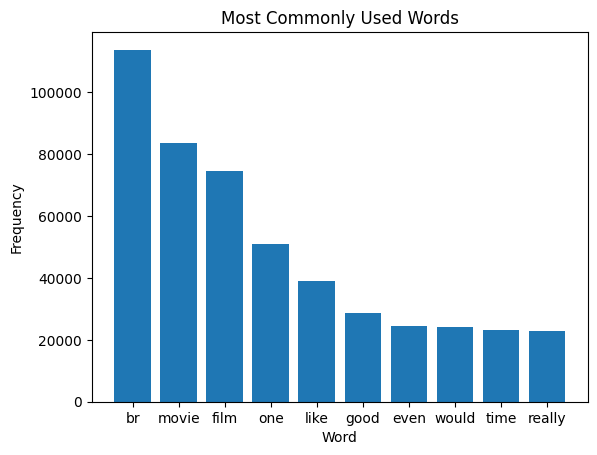

In [29]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()


**Natural Language Processing (NLP)**

***1) Clean the data***

In [30]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
%%time

tqdm.pandas()

data['cleaned_text'] = data['review'].progress_apply(clean_text)

  0%|          | 0/50000 [00:00<?, ?it/s]

CPU times: user 16min 12s, sys: 1min 55s, total: 18min 8s
Wall time: 18min 27s


***2. Feature Extraction & Data Split into Training & Testing Datasets***

In [33]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(data['cleaned_text']).toarray()
y = data['sentiment']

In [34]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***a) Logistic Regression Model***

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [37]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)

In [39]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [40]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8679


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

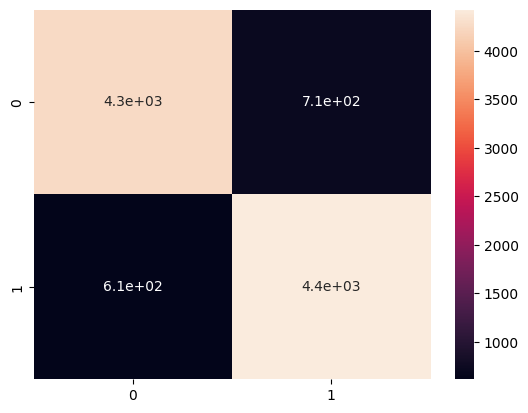

In [42]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [43]:
cm

array([[4253,  708],
       [ 613, 4426]])

***b) Multinomial Naive Bayes Model***

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# train a Naive Bayes classifier
mnb = MultinomialNB()
mnb

MultinomialNB()

In [45]:
clf = LogisticRegression(max_iter = 1000)

In [46]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [49]:
# evaluate the classifier on the test set
y_pred = mnb.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [50]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8431


<Axes: >

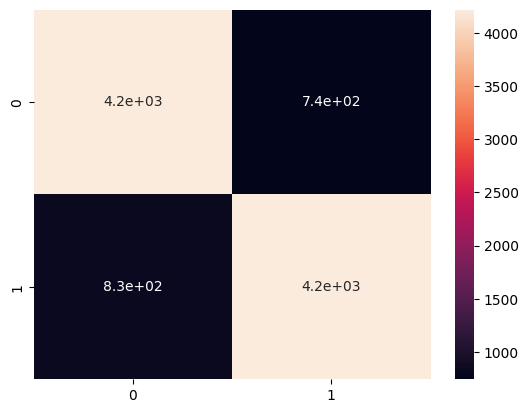

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [52]:
cm

array([[4219,  742],
       [ 827, 4212]])

***c) Decision Tree Model***

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # train a Decision Tree classifier 
dt = DecisionTreeClassifier()


In [54]:
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [55]:
# evaluate the classifier on the test set
y_pred = dt.predict(X_test)
y_pred


array([0, 1, 0, ..., 1, 0, 1])

In [56]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7236


<Axes: >

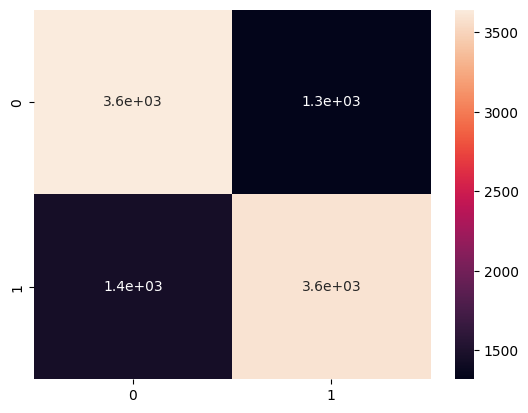

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [58]:
cm

array([[3643, 1318],
       [1446, 3593]])

***Hence Logistic Regression Model has the highest accuracy with 87%.***